Movie Review Sentiment Analysis

In [77]:
!pip install pandas numpy scikit-learn nltk matplotlib

In [78]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')

In [79]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [80]:
print("\nSentiment counts:\n", df['sentiment'].value_counts())


Sentiment counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [81]:
df.isnull().sum()

,0
review,0
sentiment,0


Dataset loaded with clean 50-50 class balance. No missing values detected

Cleaning text by removing HTML/special chars, lowercasing, stopwords, and lemmatization

In [82]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove tags
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

df['cleaned_text'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [83]:
print(df['cleaned_text'].head())

0    one reviewer mentioned watching oz episode you...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically there family little boy jake think t...
4    petter matteis love time money visually stunni...
Name: cleaned_text, dtype: object


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (40000, 5000)
Test shape: (10000, 5000)


Train a Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.89      0.88     10000



Model achieves 88.5% accuracy

Test with Custom Input

In [86]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    vector = tfidf.transform([cleaned_text]).toarray()
    prediction = model.predict(vector)[0]
    return "Positive" if prediction == 1 else "Negative"

In [87]:
print(predict_sentiment("This movie was fantastic! The acting was brilliant."))

Positive


In [88]:
print(predict_sentiment("Terrible plot, wasted my time."))

Negative


Evaluvation

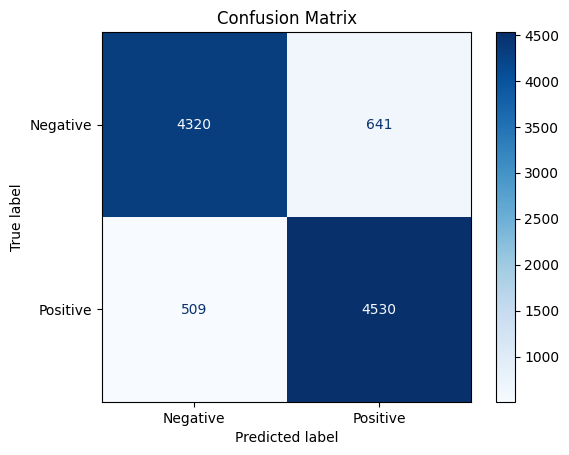

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [90]:
import pickle

# Save model and TF-IDF vectorizer
pickle.dump(model, open('sentiment_model.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))

print("Model and vectorizer saved!")

Model and vectorizer saved!


Saving model and vectorizer as .pkl files for deployment.